# Hyperelastic strain energy model database

GAMM Activity Group Data-driven modeling and numerical simulation of microstructured materials (GAMM AG DATA)

contact: Felix Fritzen <fritzen@simtech.uni-stuttgart.de>

## Example usage

In [2]:
import constitutive_models.torch_HypEl as hyp_el
import torch
import matplotlib.pyplot as plt

In [3]:
E = 75.e3 # MPa
nu = 0.3

# create a Neo Hooke and a Mooney Rivlin material
neo_hooke = hyp_el.torch_NeoHooke(E=E, nu=nu)
mooney = hyp_el.torch_MooneyRivlin(E=E, nu=nu, C01=5.e-3)

# get some random deformations
F = hyp_el.RandomDeformations(n=10, amp=0.15)

# compute energy and (analytical) stress
W, P = neo_hooke.W(F, stress=True)

In [4]:
# compute the stress via auto-differentiation
F.requires_grad=True
P_num = neo_hooke.autograd_stress(F)
print("relative errors:")
abs_err, rel_err = hyp_el.rel_err(P_num, P)
for i in range(P.shape[0]):
    print(f'sample {i:4d} - rel. err. {rel_err[i]*100.:16.10f} %')

relative errors:
sample    0 - rel. err.     0.0000000000 %
sample    1 - rel. err.     0.0000000000 %
sample    2 - rel. err.     0.0000000000 %
sample    3 - rel. err.     0.0000000000 %
sample    4 - rel. err.     0.0000000000 %
sample    5 - rel. err.     0.0000000000 %
sample    6 - rel. err.     0.0000000000 %
sample    7 - rel. err.     0.0000000000 %
sample    8 - rel. err.     0.0000000000 %
sample    9 - rel. err.     0.0000000000 %


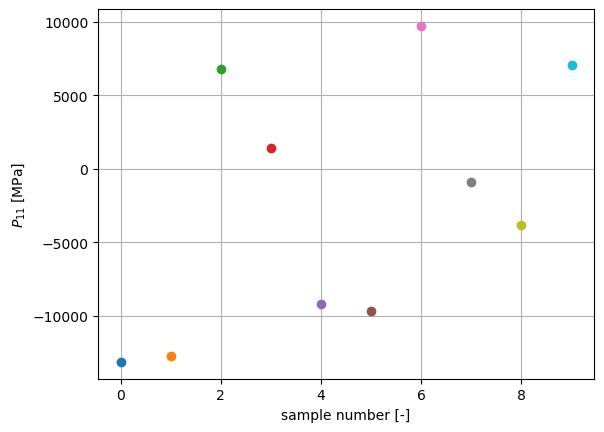

In [5]:
fig, ax = plt.subplots(1, 1)
for i in range(P.shape[0]):
    # plot the 11 stress
    ax.plot(i, P[i, 0, 0], 'o')
ax.set_xlabel('sample number [-]')
ax.set_ylabel(r'$P_{11}$ [MPa]')
ax.grid()

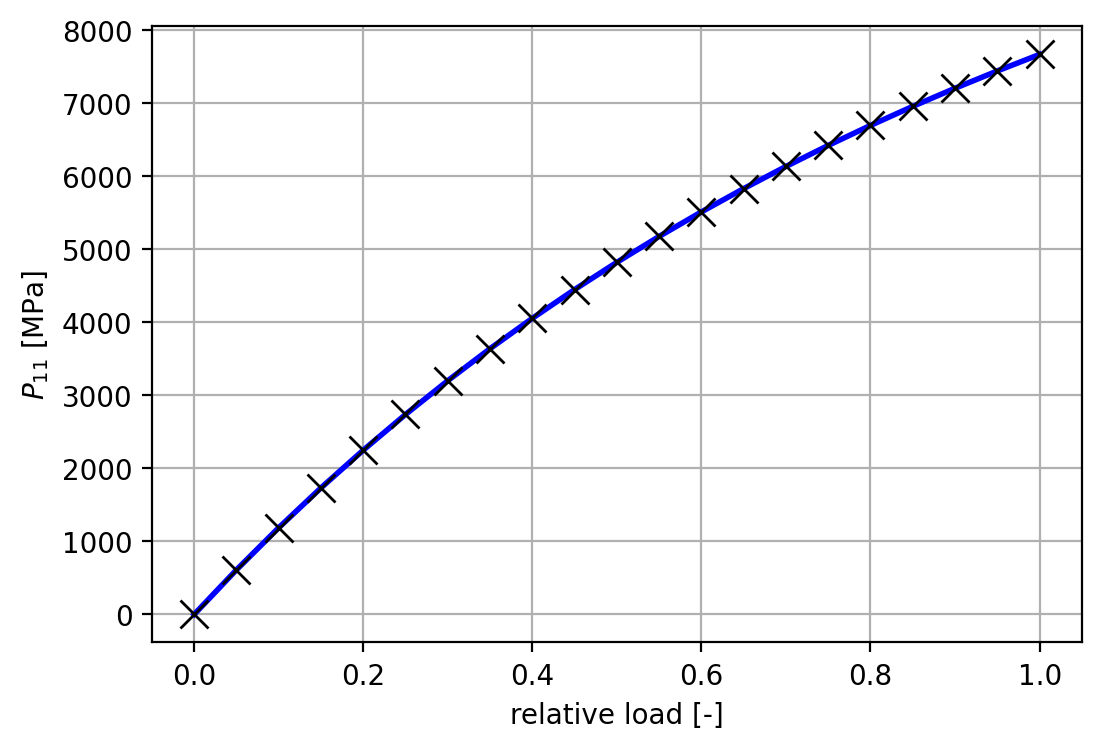

In [6]:
# now we trace a deformation from 0 to final loading
F0 = hyp_el.RandomDeformations( n=1, amp=0.25, isochoric=True)
n_step=20
amp = torch.linspace(0., 1., n_step+1)
F = amp[:, None, None] * (F0[0, :, :]-torch.eye(3)) + torch.eye(3)[None, :, :]
F.requires_grad=True
P_num = neo_hooke.autograd_stress(F)
P = neo_hooke.stress(F)
fig, ax = plt.subplots(1, 1, dpi=200, figsize=(6,4))
ax.plot(amp.detach().numpy(), P_num[:, 0, 0].detach().numpy(), '-', color='blue', lw=2, label='numerical')
ax.plot(amp.detach().numpy(), P[:, 0, 0].detach().numpy(), 'x', ms=10, color='black', label='close form')
ax.set_xlabel('relative load [-]')
ax.set_ylabel(r'$P_{11}$ [MPa]')
ax.grid()

In [7]:
# short-cut: compares numerically computed stresses against the
# provided closed form expression (mainly for validation)
hyp_el.demo_NeoHooke(n=10, amp=0.5)

rel. error   0:   0.00 %
rel. error   1:   0.00 %
rel. error   2:   0.00 %
rel. error   3:   0.00 %
rel. error   4:   0.00 %
rel. error   5:   0.00 %
rel. error   6:   0.00 %
rel. error   7:   0.00 %
rel. error   8:   0.00 %
rel. error   9:   0.00 %


## The compressible gent model

based on https://en.wikipedia.org/wiki/Gent_hyperelastic_model

The strain energy employs a dilatational deviatoric split. The dilatational part is as in the incompressible Gent model. The dilatational part is
\begin{align}
U(J) = \frac{K}{2} \left( \frac{J^2-1}{2} - \mathrm{ln} (J) \right)^4
\end{align}

In [8]:
gent = hyp_el.torch_Gent()
hyp_el.demo_HypEl(gent, n=10, amp=0.1)

RuntimeError: The size of tensor a (10) must match the size of tensor b (3) at non-singleton dimension 2